# Introdução

Datasets utilizados:

* https://dadosabertos.rfb.gov.br/CNPJ/
* https://compras.dados.gov.br/comprasContratos/v1/contratos.html


O objetivo principal dessa análise é identificar padrões, relações e insights relevantes que possam surgir do cruzamento entre essas duas fontes de informação. Busca-se compreender como a presença de empresas registradas na Receita Federal se relaciona com sua participação em contratos governamentais firmados a partir de 2021.



# Configurando o Spark

In [ ]:
!ls
#Instacao e configuracao do Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Download do Apache Spark
!wget -q https://apache.osuosl.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
#Descompatacao do Apache Spark
!tar xf spark-3.5.1-bin-hadoop3.tgz

sample_data


In [ ]:
!ls

sample_data  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"
os.environ["JAVA_OPTS"] = "-Xmx8G"

In [ ]:
!curl -L -o "/content/spark-3.5.1-bin-hadoop3/jars/graphframes-0.8.2-spark3.2-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar

# Foi baixado mas não está sendo parametrizado. -> Mesmo assim o GraphFrames está funcionando.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  242k  100  242k    0     0  1326k      0 --:--:-- --:--:-- --:--:-- 1330k


In [ ]:
#Instalacao do Findspark
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
# A versão que está sendo chamada é a graphframes:graphframes:0.7.0-spark2.4-s_2.11 e ela não existe nos arquivos jars.
# O GraphFrames já vem como padrão?
spark = SparkSession.builder.master("local[*]").config("spark.jars.packages", "graphframes:graphframes:0.7.0-spark2.4-s_2.11").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import drive
#drive.flush_and_unmount()

**Validando a configuração do Spark**

In [ ]:
import pyspark
print(pyspark.__version__)

3.5.1


**Validando o GraphFrames**

In [ ]:
from graphframes import *

# Baixando e Listando os Arquivos

In [ ]:
!mkdir /content/drive/MyDrive/Datasets
!mkdir /content/drive/MyDrive/CNPJ_Download
!mkdir /content/drive/MyDrive/Datasets/CNPJ

In [ ]:
!mkdir /content/drive/MyDrive/Datasets/CNPJ/Empresas
!mkdir /content/drive/MyDrive/CNPJ_Download/Empresas

In [ ]:
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas0.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas0.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas1.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas1.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas2.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas2.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas3.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas3.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas4.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas4.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas5.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas5.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas6.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas6.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas7.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas7.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas8.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas8.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Empresas9.zip > /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas9.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  301M  100  301M    0     0  6987k      0  0:00:44  0:00:44 --:--:-- 9392k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74.1M  100 74.1M    0     0  5231k      0  0:00:14  0:00:14 --:--:-- 6864k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75.3M  100 75.3M    0     0  4767k      0  0:00:16  0:00:16 --:--:-- 5512k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 81.2M  100 81.2M    0     0  4176k      0  0:00:19  0:00:19 --:--:-- 5465k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas0.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas1.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas2.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas3.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas4.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas5.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas6.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas7.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas8.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas
!unzip /content/drive/MyDrive/CNPJ_Download/Empresas/Empresas9.zip -d /content/drive/MyDrive/Datasets/CNPJ/Empresas

Archive:  /content/drive/MyDrive/Datasets/CNPJ/Empresas0.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/K3241.K03200Y0.D40210.EMPRECSV  
Archive:  /content/drive/MyDrive/Datasets/CNPJ/Empresas1.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/K3241.K03200Y1.D40210.EMPRECSV  
Archive:  /content/drive/MyDrive/Datasets/CNPJ/Empresas2.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/K3241.K03200Y2.D40210.EMPRECSV  
Archive:  /content/drive/MyDrive/Datasets/CNPJ/Empresas3.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/K3241.K03200Y3.D40210.EMPRECSV  
Archive:  /content/drive/MyDrive/Datasets/CNPJ/Empresas4.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/K3241.K03200Y4.D40210.EMPRECSV  
Archive:  /content/drive/MyDrive/Datasets/CNPJ/Empresas5.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/K3241.K03200Y5.D40210.EMPRECSV  
Archive:  /content/drive/MyDrive/Datasets/CNPJ/Empresas6.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/K3241.K03200Y6.D40210.EMP

In [ ]:
!mkdir /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!mkdir /content/drive/MyDrive/CNPJ_Download/Estabelecimentos

In [ ]:
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos0.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos0.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos1.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos1.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos2.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos2.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos3.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos3.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos4.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos4.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos5.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos5.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos6.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos6.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos7.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos7.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos8.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos8.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Estabelecimentos9.zip > /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos9.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1166M  100 1166M    0     0  3058k      0  0:06:30  0:06:30 --:--:--  873k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  322M  100  322M    0     0  1675k      0  0:03:17  0:03:17 --:--:-- 5817k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  322M  100  322M    0     0  5881k      0  0:00:56  0:00:56 --:--:-- 5704k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  320M  100  320M    0     0  6248k      0  0:00:52  0:00:52 --:--:-- 6891k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos0.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos1.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos2.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos3.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos4.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos5.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos6.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos7.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos8.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos
!unzip /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos9.zip -d /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos

Archive:  /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos0.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos/K3241.K03200Y0.D40210.ESTABELE  
Archive:  /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos1.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos/K3241.K03200Y1.D40210.ESTABELE  
Archive:  /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos2.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos/K3241.K03200Y2.D40210.ESTABELE  
Archive:  /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos3.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos/K3241.K03200Y3.D40210.ESTABELE  
Archive:  /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabelecimentos4.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos/K3241.K03200Y4.D40210.ESTABELE  
Archive:  /content/drive/MyDrive/CNPJ_Download/Estabelecimentos/Estabe

In [ ]:
!mkdir /content/drive/MyDrive/Datasets/CNPJ/Cnaes
!mkdir /content/drive/MyDrive/CNPJ_Download/Cnaes

In [ ]:
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Cnaes.zip > /content/drive/MyDrive/CNPJ_Download/Cnaes/Cnaes.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22078  100 22078    0     0  16409      0  0:00:01  0:00:01 --:--:-- 16402


In [ ]:
!unzip /content/drive/MyDrive/CNPJ_Download/Cnaes/Cnaes.zip -d /content/drive/MyDrive/Datasets/CNPJ/Cnaes

Archive:  /content/drive/MyDrive/CNPJ_Download/Cnaes/Cnaes.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Cnaes/F.K03200$Z.D40210.CNAECSV  


In [ ]:
!mkdir /content/drive/MyDrive/Datasets/CNPJ/Qualificacoes
!mkdir /content/drive/MyDrive/CNPJ_Download/Qualificacoes

In [ ]:
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Qualificacoes.zip > /content/drive/MyDrive/CNPJ_Download/Qualificacoes/Qualificacoes.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   980  100   980    0     0   1150      0 --:--:-- --:--:-- --:--:--  1150


In [ ]:
!unzip /content/drive/MyDrive/CNPJ_Download/Qualificacoes/Qualificacoes.zip -d /content/drive/MyDrive/Datasets/CNPJ/Qualificacoes

Archive:  /content/drive/MyDrive/CNPJ_Download/Qualificacoes/Qualificacoes.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Qualificacoes/F.K03200$Z.D40210.QUALSCSV  


In [ ]:
!mkdir /content/drive/MyDrive/Datasets/CNPJ/Socios
!mkdir /content/drive/MyDrive/CNPJ_Download/Socios

In [ ]:
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios0.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios0.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios1.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios1.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios2.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios2.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios3.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios3.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios4.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios4.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios5.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios5.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios6.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios6.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios7.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios7.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios8.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios8.zip
!curl -X GET --header 'Accept: application/json' https://dadosabertos.rfb.gov.br/CNPJ/Socios9.zip > /content/drive/MyDrive/CNPJ_Download/Socios/Socios9.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129M  100  129M    0     0  4817k      0  0:00:27  0:00:27 --:--:-- 8319k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 47.0M  100 47.0M    0     0  4134k      0  0:00:11  0:00:11 --:--:-- 5568k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46.9M  100 46.9M    0     0  3391k      0  0:00:14  0:00:14 --:--:-- 4275k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46.8M  100 46.8M    0     0  3237k      0  0:00:14  0:00:14 --:--:-- 4004k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios0.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios1.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios2.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios3.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios4.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios5.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios6.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios7.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios8.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios
!unzip /content/drive/MyDrive/CNPJ_Download/Socios/Socios9.zip -d /content/drive/MyDrive/Datasets/CNPJ/Socios

Archive:  /content/drive/MyDrive/CNPJ_Download/Socios/Socios0.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Socios/K3241.K03200Y0.D40210.SOCIOCSV  
Archive:  /content/drive/MyDrive/CNPJ_Download/Socios/Socios1.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Socios/K3241.K03200Y1.D40210.SOCIOCSV  
Archive:  /content/drive/MyDrive/CNPJ_Download/Socios/Socios2.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Socios/K3241.K03200Y2.D40210.SOCIOCSV  
Archive:  /content/drive/MyDrive/CNPJ_Download/Socios/Socios3.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Socios/K3241.K03200Y3.D40210.SOCIOCSV  
Archive:  /content/drive/MyDrive/CNPJ_Download/Socios/Socios4.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Socios/K3241.K03200Y4.D40210.SOCIOCSV  
Archive:  /content/drive/MyDrive/CNPJ_Download/Socios/Socios5.zip
  inflating: /content/drive/MyDrive/Datasets/CNPJ/Socios/K3241.K03200Y5.D40210.SOCIOCSV  
Archive:  /content/drive/MyDrive/CNPJ_Download/Socios/Socios6.zi

In [ ]:
!mkdir /content/drive/MyDrive/Datasets/Compras_Contratos

In [ ]:
# Importar o dataset de contratos de compras que encontra-se em anexo na entrega da script .ipynb
from google.colab import files
arquivo = files.upload()

Saving Compras_Contratos.zip to Compras_Contratos.zip


In [ ]:
!mv *Compras_Contratos* /content/drive/MyDrive/Datasets

In [ ]:
!ls /content/drive/MyDrive/Datasets/Compras_Contratos

Compras  Compras_Contratos.zip


In [ ]:
!mv /content/drive/MyDrive/Datasets/Compras_Contratos/Compras/*contratos* /content/drive/MyDrive/Datasets/Compras_Contratos

In [ ]:
!rm -r /content/drive/MyDrive/Datasets/Compras_Contratos/Compras

**Listando os arquivos**

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (67.8 kB/s)
Selecting previously unselected package tree.
(Reading database ... 122099 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Datasets') # Colocar o caminho que encontra-se os seus datasets
!tree -p

[drwx------]  .
├── [drwx------]  CNPJ
│   ├── [drwx------]  Cnaes
│   │   └── [-rw-------]  F.K03200$Z.D40210.CNAECSV
│   ├── [drwx------]  Empresas
│   │   ├── [-rw-------]  K3241.K03200Y0.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y1.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y2.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y3.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y4.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y5.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y6.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y7.D40210.EMPRECSV
│   │   ├── [-rw-------]  K3241.K03200Y8.D40210.EMPRECSV
│   │   └── [-rw-------]  K3241.K03200Y9.D40210.EMPRECSV
│   ├── [drwx------]  Estabelecimentos
│   │   ├── [-rw-------]  K3241.K03200Y0.D40210.ESTABELE
│   │   ├── [-rw-------]  K3241.K03200Y1.D40210.ESTABELE
│   │   ├── [-rw-------]  K3241.K03200Y2.D40210.ESTABELE
│   │   ├── [-rw-------]  K3241.K03200Y3.D40210.ESTABELE
│   │   ├── [

# Análise dos datasets / Criação de Views

**Tratando, transformando e criando uma view dos dados de empresas**

In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/CNPJ/Empresas/*"
df = spark.read.option("delimiter", ";").csv(path)
df.printSchema()
df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)

+--------+--------------------+----+---+--------+---+----+
|     _c0|                 _c1| _c2|_c3|     _c4|_c5| _c6|
+--------+--------------------+----+---+--------+---+----+
|41273596|RODRIGO JOSE FERR...|2135| 50|10000,00| 01|NULL|
|41273597|PACHARRUS QUEIROZ...|2135| 50| 5000,00| 01|NULL|
|41273598|GLORIA VIANA DIAS...|2135| 50| 1100,00| 01|NULL|
|41273599|ANA PAULA DA SILV...|2135| 50| 2000,00| 01|NULL|
|41273600|41.273.600 AVANIL...|2135| 50|50000,00| 01|NULL|
|41273601|GABRIELA HELENA F...|2135| 50| 2000,00| 01|NULL|
|41273602|FABIO SOUZA DO RO...|2135| 50|15000,00| 01|NULL|
|41273603|GRAFLINE ACESSORI...|2062| 49|10000,00| 01|NULL|
|41273604|RUMO - ESTUDIO DE...|2062| 49|10000,00| 01|NULL|
|41273605|WALLACE DE OLIVEI...|2135| 50| 

In [ ]:
dfEmpresas = df.selectExpr("_c0 as CNPJ","_c1 as RAZAO_SOCIAL","_c2 as NATUREZA_JURIDICA","_c3 as QUALIFICACAO_RESPONSAVEL","_c4 as CAPITAL_SOCIAL","_c5 as PORTE_EMPRESA","_c6 as ENTE_FEDERATIVO")

In [ ]:
total_cnpj = dfEmpresas.count()

In [ ]:
total_cnpj

56554319

In [ ]:
dfEmpresas.createOrReplaceTempView("empresas")

sqlDF = spark.sql("select * from empresas")
sqlDF.show(3, truncate=False)

+--------+----------------------------------------------+-----------------+------------------------+--------------+-------------+---------------+
|CNPJ    |RAZAO_SOCIAL                                  |NATUREZA_JURIDICA|QUALIFICACAO_RESPONSAVEL|CAPITAL_SOCIAL|PORTE_EMPRESA|ENTE_FEDERATIVO|
+--------+----------------------------------------------+-----------------+------------------------+--------------+-------------+---------------+
|41273596|RODRIGO JOSE FERREIRA LOPES 05010247941       |2135             |50                      |10000,00      |01           |NULL           |
|41273597|PACHARRUS QUEIROZ DA COSTA E SILVA 03618384335|2135             |50                      |5000,00       |01           |NULL           |
|41273598|GLORIA VIANA DIAS DA SILVA 13118961716        |2135             |50                      |1100,00       |01           |NULL           |
+--------+----------------------------------------------+-----------------+------------------------+--------------+---------

**Tratando, transformando e criando uma view dos dados de cnaes**

In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/CNPJ/Cnaes/*"
df = spark.read.option("delimiter", ";").option("encoding", "ISO-8859-1").csv(path)
df.printSchema()
df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)

+-------+--------------------+
|    _c0|                 _c1|
+-------+--------------------+
|0111301|    Cultivo de arroz|
|0111302|    Cultivo de milho|
|0111303|    Cultivo de trigo|
|0111399|Cultivo de outros...|
|0112101|Cultivo de algodã...|
|0112102|     Cultivo de juta|
|0112199|Cultivo de outras...|
|0113000|Cultivo de cana-d...|
|0114800|     Cultivo de fumo|
|0115600|     Cultivo de soja|
|0116401| Cultivo de amendoim|
|0116402| Cultivo de girassol|
|0116403|   Cultivo de mamona|
|0116499|Cultivo de outras...|
|0119901|  Cultivo de abacaxi|
|0119902|     Cultivo de alho|
|0119903|Cultivo de batata...|
|0119904|   Cultivo de cebola|
|0119905|   Cultivo de feijão|
|0119906| Cultivo de mandioca|
+-------+--------------------+
only showing top 20 rows



In [ ]:
dfCnaes = df.selectExpr("_c0 as CODIGO","_c1 as DESCRICAO")

In [ ]:
dfCnaes.count()

1359

In [ ]:
# Filtrando apenas por cnaes de tecnologia.
dfCnaes_select_cnaes_tecnologia = dfCnaes.where(dfCnaes.CODIGO.isin(["6204000", "6201501", "6202300", "6203100", "6209100", "6201502"]))
dfCnaes_select_cnaes_tecnologia.createOrReplaceTempView("cnaes")

sqlCN = spark.sql("select * from cnaes")
sqlCN.show(truncate=False)

+-------+----------------------------------------------------------------------------+
|CODIGO |DESCRICAO                                                                   |
+-------+----------------------------------------------------------------------------+
|6201501|Desenvolvimento de programas de computador sob encomenda                    |
|6201502|Web design                                                                  |
|6202300|Desenvolvimento e licenciamento de programas de computador customizáveis    |
|6203100|Desenvolvimento e licenciamento de programas de computador não-customizáveis|
|6204000|Consultoria em tecnologia da informação                                     |
|6209100|Suporte técnico, manutenção e outros serviços em tecnologia da informação   |
+-------+----------------------------------------------------------------------------+



**Tratando, transformando e criando uma view dos dados de estabelecimentos - Tecnologia**

In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos/*"
df = spark.read.option("delimiter", ";").csv(path)
df.printSchema()
df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (nullable = tru

In [ ]:
dfEstab = df.selectExpr("_c0 as CNPJ","_c1 as ORDEM","_c2 as DV","_c3 as MATRIZ_FILIAL","_c4 as NOME_FANTASIA","_c5 as SITUACAO","_c6 as DATA_SITUACAO","_c7 as MOTIVO_SITUACAO","_c8 as CIDADE","_c9 as PAIS","_c10 as DT_INICIO","_c11 as CNAES_PRINCIPAL","_c12 as CNAES_SEC","_c13 as TIPO_LOGRADOURO","_c14 as LOGRADOURO","_c15 as NUMERO","_c16 as COMPLEMENTO","_c17 as BAIRRO","_c18 as CEP","_c19 as UF","_c20 as MUNICIPIO","_c21 as DDD1","_c22 as TELEFONE1","_c23 as DDD2","_c24 as TELEFONE2","_c25 as DDDFAX","_c26 as FAX","_c27 as EMAIL","_c28 SITUACAO_ESPECIAL","_c29 as DT_SITUACAO_ESPECIAL")

In [ ]:
dfEstab_select_estabelecimentos_tecnologia = dfEstab.where(dfEstab.CNAES_PRINCIPAL.isin(["6204000", "6201501", "6202300", "6203100", "6209100", "6201502"])).distinct()
dfEstab_select_estabelecimentos_tecnologia.createOrReplaceTempView("estabelecimentos")

sqlES = spark.sql("select * from estabelecimentos")
sqlES.show(10,truncate=False)

**Tratando, transformando e criando uma view dos dados de Contratos de Compras**

In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/Compras_Contratos/*"
dfCompras_Contratos = spark.read.json(path)
dfCompras_Contratos.printSchema()
dfCompras_Contratos.show(10,truncate=False)

root
 |-- _embedded: struct (nullable = true)
 |    |-- contratos: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- _links: struct (nullable = true)
 |    |    |    |    |-- licitacao: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |    |    |-- title: string (nullable = true)
 |    |    |    |    |-- modalidade_licitacao: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |    |    |-- title: string (nullable = true)
 |    |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |    |    |-- title: string (nullable = true)
 |    |    |    |    |-- uasg: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |    |    |-- title: string (nullable = true)
 |    |    |    |-- categoria: string (nullable = true)
 |    |   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
from pandas import json_normalize
import os
import re

# Diretório que contém os arquivos JSON
diretorio = "/content/drive/MyDrive/Datasets/Compras_Contratos"

# Lista para armazenar os DataFrames lidos de cada arquivo
dfs = []

os.listdir(diretorio)

# Loop pelos arquivos no diretório
for arquivo in os.listdir(diretorio):
    if arquivo.endswith('.json'):
        caminho_arquivo = os.path.join(diretorio, arquivo)
        df = pd.read_json(caminho_arquivo)
        df_desmembrado = json_normalize(df['_embedded'], 'contratos', errors='ignore')
        dfs.append(df_desmembrado)

# Concatenar todos os DataFrames em um único DataFrame Pandas
df_pandas = pd.concat(dfs, ignore_index=True)

# Função para tratar o formato do CNPJ
def tratar_cnpj(cnpj):
    cnpj_tratado = re.sub(r'\D', '', cnpj)  # Remove todos os caracteres não numéricos
    cnpj_tratado = cnpj_tratado[:8]
    return cnpj_tratado

# Aplicar a função de tratamento ao DataFrame Pandas
df_pandas['fornecedor_cnpj_cpf_idgener'] = df_pandas['fornecedor_cnpj_cpf_idgener'].apply(tratar_cnpj)

# Criar DataFrame Spark
df_Compras_Contratos = spark.createDataFrame(df_pandas)

# Exibir DataFrame Spark
df_Compras_Contratos.head(5)

[Row(id=19553, codigo_contrato='15308050000962017', numero='00096/2017', receita_despesa='Despesa', orgao_codigo=26242, orgao_nome='UNIVERSIDADE FEDERAL DE PERNAMBUCO', unidade_codigo=153080, unidade_nome_resumido='UFPE', unidade_nome='UNIVERSIDADE FEDERAL DE PERNAMBUCO', unidade_origem_codigo='153080', unidade_origem_nome='UNIVERSIDADE FEDERAL DE PERNAMBUCO', codigo_tipo=50, tipo='Contrato', categoria='Serviços', processo='23076.048171/2016-15', objeto='CONTRATAÇÃO DE EMPRESA ESPECIALIZADA EM SERVIÇOS DE CONTROLE DE PRAGAS DE CUPINS, RATOS E INSETOS RASTEIROS E VOADORES EM ÁREAS ESPECÍFICAS DO CAMPUS RECIFE DA UFPE.', fundamento_legal='LEI Nº 8.666/93, ATUALIZADA.', data_assinatura='2017-11-14', data_publicacao='2017-11-28', vigencia_inicio='2017-11-14', vigencia_fim='2022-05-08', valor_inicial=115920.0, valor_global=141157.88, num_parcelas=1, valor_parcela=141157.88, valor_acumulado=1835052.44, fornecedor_tipo='JURIDICA', fornecedor_cnpj_cpf_idgener='10286009', fornecedor_nome='EFICA

In [ ]:
df_Compras_Contratos.show(10,truncate=False)

+-----+-----------------+----------+---------------+------------+-------------------------------------------+--------------+---------------------+-------------------------------------------+---------------------+-----------------------------------------+-----------+--------+---------+--------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------+---------------+---------------+---------------+------------+-------------+------------+------------+-------------+---------------+---------------+---------------------------+-------------------------------------------------------+-----------------+-----------------+----------+--------------+----------------+-----------------------------------------------------------------------

In [ ]:
df_Compras_Contratos.createOrReplaceTempView("compras_contratos")

sqlCC = spark.sql("select * from compras_contratos")
sqlCC.show(10,truncate=False)

+-----+-----------------+----------+---------------+------------+-------------------------------------------+--------------+---------------------+-------------------------------------------+---------------------+-----------------------------------------+-----------+--------+---------+--------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------+---------------+---------------+---------------+------------+-------------+------------+------------+-------------+---------------+---------------+---------------------------+-------------------------------------------------------+-----------------+-----------------+----------+--------------+----------------+-----------------------------------------------------------------------

**Views**

In [ ]:
"""
empresas
cnaes -> Tecnologia
estabelecimentos -> Tecnologia
compras_contratos
"""

**Salvando as views**

In [ ]:
sqlCN.write.mode("overwrite") \
     .option("delimiter", ";") \
     .option("header", "true") \
     .csv("Cnaes_tecnologia")

In [ ]:
sqlES.write.mode("overwrite") \
     .option("delimiter", ";") \
     .option("header", "true") \
     .csv("Estabelecimentos_tecnologia")

In [ ]:
sqlDF.write.mode("overwrite") \
     .option("delimiter", ";") \
     .option("header", "true") \
     .csv("Empresas_tratadas")

In [ ]:
sqlCC.write.mode("overwrite") \
     .option("delimiter", ";") \
     .option("header", "true") \
     .csv("Compras_Contratos_tratados")

In [ ]:
!mv /content/drive/MyDrive/Datasets/Cnaes_tecnologia /content/drive/MyDrive/Datasets/CNPJ

In [ ]:
!mv /content/drive/MyDrive/Datasets/Estabelecimentos_tecnologia /content/drive/MyDrive/Datasets/CNPJ

In [ ]:
!mv /content/drive/MyDrive/Datasets/Empresas_tratadas /content/drive/MyDrive/Datasets/CNPJ

# Graph

**Plotando gráfico para representativo em relações entre fornecedores (estabelecimentos de tecnologia) e unidades de compra.**

In [ ]:
from graphframes import *
import networkx as nx

In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/CNPJ/Cnaes_tecnologia/*"
df_Cnaes_tecnologia = spark.read.option("delimiter", ";").option("header", True).csv(path) # Foi adicionado option("header", True) para subir os cabeçalhos.
df_Cnaes_tecnologia.printSchema()
df_Cnaes_tecnologia.show(truncate=False)

root
 |-- CODIGO: string (nullable = true)
 |-- DESCRICAO: string (nullable = true)

+-------+----------------------------------------------------------------------------+
|CODIGO |DESCRICAO                                                                   |
+-------+----------------------------------------------------------------------------+
|6201501|Desenvolvimento de programas de computador sob encomenda                    |
|6201502|Web design                                                                  |
|6202300|Desenvolvimento e licenciamento de programas de computador customizáveis    |
|6203100|Desenvolvimento e licenciamento de programas de computador não-customizáveis|
|6204000|Consultoria em tecnologia da informação                                     |
|6209100|Suporte técnico, manutenção e outros serviços em tecnologia da informação   |
+-------+----------------------------------------------------------------------------+



In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/CNPJ/Empresas_tratadas/*"
df_Empresas_tratadas = spark.read.option("delimiter", ";").option("header", True).csv(path) # Foi adicionado option("header", True) para subir os cabeçalhos.
df_Empresas_tratadas.printSchema()
df_Empresas_tratadas.show(5,truncate=False)

root
 |-- CNPJ: string (nullable = true)
 |-- RAZAO_SOCIAL: string (nullable = true)
 |-- NATUREZA_JURIDICA: string (nullable = true)
 |-- QUALIFICACAO_RESPONSAVEL: string (nullable = true)
 |-- CAPITAL_SOCIAL: string (nullable = true)
 |-- PORTE_EMPRESA: string (nullable = true)
 |-- ENTE_FEDERATIVO: string (nullable = true)

+--------+-----------------------------------------+-----------------+------------------------+--------------+-------------+---------------+
|CNPJ    |RAZAO_SOCIAL                             |NATUREZA_JURIDICA|QUALIFICACAO_RESPONSAVEL|CAPITAL_SOCIAL|PORTE_EMPRESA|ENTE_FEDERATIVO|
+--------+-----------------------------------------+-----------------+------------------------+--------------+-------------+---------------+
|38378896|MIQUEIAS LEONARDO SILVA 43017011844      |2135             |50                      |5000,00       |01           |NULL           |
|38378897|DENIS YOSHIAKI OGIHARA 28550825875       |2135             |50                      |10000,00    

In [ ]:
df_Empresas_tratadas.createOrReplaceTempView("empresas_tratadas")

In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/CNPJ/Estabelecimentos_tecnologia/*"
df_Estabelecimentos_tecnologia = spark.read.option("delimiter", ";").option("header", True).csv(path) # Foi adicionado option("header", True) para subir os cabeçalhos.
df_Estabelecimentos_tecnologia.printSchema()
df_Estabelecimentos_tecnologia.show(5,truncate=False)

root
 |-- CNPJ: string (nullable = true)
 |-- ORDEM: string (nullable = true)
 |-- DV: string (nullable = true)
 |-- MATRIZ_FILIAL: string (nullable = true)
 |-- NOME_FANTASIA: string (nullable = true)
 |-- SITUACAO: string (nullable = true)
 |-- DATA_SITUACAO: string (nullable = true)
 |-- MOTIVO_SITUACAO: string (nullable = true)
 |-- CIDADE: string (nullable = true)
 |-- PAIS: string (nullable = true)
 |-- DT_INICIO: string (nullable = true)
 |-- CNAES_PRINCIPAL: string (nullable = true)
 |-- CNAES_SEC: string (nullable = true)
 |-- TIPO_LOGRADOURO: string (nullable = true)
 |-- LOGRADOURO: string (nullable = true)
 |-- NUMERO: string (nullable = true)
 |-- COMPLEMENTO: string (nullable = true)
 |-- BAIRRO: string (nullable = true)
 |-- CEP: string (nullable = true)
 |-- UF: string (nullable = true)
 |-- MUNICIPIO: string (nullable = true)
 |-- DDD1: string (nullable = true)
 |-- TELEFONE1: string (nullable = true)
 |-- DDD2: string (nullable = true)
 |-- TELEFONE2: string (nullable

In [ ]:
df_Estabelecimentos_tecnologia.createOrReplaceTempView("Estabelecimentos_tecnologia")

In [ ]:
#sc = spark.sparkContext
path = "/content/drive/MyDrive/Datasets/Compras_Contratos_tratados/*"
df_Compras_Contratos_tratados = spark.read.option("delimiter", ";").option("header", True).csv(path) # Foi adicionado option("header", True) para subir os cabeçalhos.
df_Compras_Contratos_tratados.printSchema()
df_Compras_Contratos_tratados.show(truncate=False)

root
 |-- id: string (nullable = true)
 |-- codigo_contrato: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- receita_despesa: string (nullable = true)
 |-- orgao_codigo: string (nullable = true)
 |-- orgao_nome: string (nullable = true)
 |-- unidade_codigo: string (nullable = true)
 |-- unidade_nome_resumido: string (nullable = true)
 |-- unidade_nome: string (nullable = true)
 |-- unidade_origem_codigo: string (nullable = true)
 |-- unidade_origem_nome: string (nullable = true)
 |-- codigo_tipo: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- categoria: string (nullable = true)
 |-- processo: string (nullable = true)
 |-- objeto: string (nullable = true)
 |-- fundamento_legal: string (nullable = true)
 |-- data_assinatura: string (nullable = true)
 |-- data_publicacao: string (nullable = true)
 |-- vigencia_inicio: string (nullable = true)
 |-- vigencia_fim: string (nullable = true)
 |-- valor_inicial: string (nullable = true)
 |-- valor_global: s

In [ ]:
df_Compras_Contratos_tratados.createOrReplaceTempView("Compras_Contratos_tratados")

In [ ]:
# Filtrando 50 registros com as maiores empresas de tecnologia (capital social) com contratos governamentais.

sql_Top_50 = spark.sql("""
SELECT
  CCT.*
FROM
  empresas_tratadas E
INNER JOIN Compras_Contratos_tratados CCT
        ON CCT.fornecedor_cnpj_cpf_idgener = E.CNPJ
INNER JOIN Estabelecimentos_tecnologia ET
        ON ET.CNPJ = E.CNPJ
ORDER BY CAST(E.capital_social AS FLOAT) DESC
LIMIT (50)
""")
sql_Top_50.show(5,truncate=False)

+------+-----------------+----------+---------------+------------+---------------------------------------------+--------------+---------------------+---------------------------------------------+---------------------+--------------------------------------+-----------+--------+-----------------+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+---------------+---------------+---------------+------------+-------------+------------+------------+-------------+---------------+---------------+---------------------------+-------------------------------------+-----------------+-----------------+---------------+--------------+----------------+-----------------------+------------------------------------+-----------------------------+-------------

In [ ]:
# Salvando os 50 registros em CSV.

sql_Top_50.write.mode("overwrite") \
     .option("delimiter", ";") \
     .option("header", "true") \
     .csv("Top_50_Empresas_CapitalSocial")

In [ ]:
!mv /content/Top_50_Empresas_CapitalSocial /content/drive/MyDrive/Datasets

In [ ]:
path = "/content/drive/MyDrive/Datasets/Top_50_Empresas_CapitalSocial/*"
df_Top_50_Empresas_CapitalSocial = spark.read.option("delimiter", ";").option("header", True).csv(path) # Foi adicionado option("header", True) para subir os cabeçalhos.
df_Top_50_Empresas_CapitalSocial.printSchema()
df_Top_50_Empresas_CapitalSocial.show(truncate=False)

root
 |-- id: string (nullable = true)
 |-- codigo_contrato: string (nullable = true)
 |-- numero: string (nullable = true)
 |-- receita_despesa: string (nullable = true)
 |-- orgao_codigo: string (nullable = true)
 |-- orgao_nome: string (nullable = true)
 |-- unidade_codigo: string (nullable = true)
 |-- unidade_nome_resumido: string (nullable = true)
 |-- unidade_nome: string (nullable = true)
 |-- unidade_origem_codigo: string (nullable = true)
 |-- unidade_origem_nome: string (nullable = true)
 |-- codigo_tipo: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- categoria: string (nullable = true)
 |-- processo: string (nullable = true)
 |-- objeto: string (nullable = true)
 |-- fundamento_legal: string (nullable = true)
 |-- data_assinatura: string (nullable = true)
 |-- data_publicacao: string (nullable = true)
 |-- vigencia_inicio: string (nullable = true)
 |-- vigencia_fim: string (nullable = true)
 |-- valor_inicial: string (nullable = true)
 |-- valor_global: s

In [ ]:
df_Top_50_Empresas_CapitalSocial.count()

50

In [ ]:
df_Top_50_Empresas_CapitalSocial.createOrReplaceTempView("Top_50_Empresas_CapitalSocial")

In [ ]:
# Criando os vertices e edges.

# Todos os órgãos e fornecedores

sql = '''
      SELECT DISTINCT
        orgao_codigo AS id,
        orgao_nome AS nome
      FROM
        Top_50_Empresas_CapitalSocial

      UNION

      SELECT
        CASE
          WHEN fornecedor_cnpj_cpf_idgener = '' THEN id
          ELSE fornecedor_cnpj_cpf_idgener
          END AS id,
        fornecedor_nome
      FROM
        Top_50_Empresas_CapitalSocial
'''
vertices = spark.sql(sql)

# Categoria da relação contratual entre fornecedores e orgãos.

sql = '''
      SELECT
        fornecedor_cnpj_cpf_idgener AS dst,
        orgao_codigo AS src,
        categoria AS RELATIONSHIP
      FROM
        Top_50_Empresas_CapitalSocial

      UNION

      SELECT
        orgao_codigo AS dst,
        fornecedor_cnpj_cpf_idgener AS src,
        categoria AS RELATIONSHIP
      FROM
        Top_50_Empresas_CapitalSocial
'''
edges = spark.sql(sql)

In [ ]:
# Armazenando todos os forncedores de tecnologia e unidades onde o nome e o id não encontra-se nulo.

sql_vertices = spark.sql("""
SELECT
  ET.CNPJ AS id,
  ET.NOME_FANTASIA AS nome
FROM
  Estabelecimentos_tecnologia AS ET
WHERE 1=1
  AND ET.nome_fantasia IS NOT NULL
  AND ET.NOME_FANTASIA IS NOT NULL

UNION

SELECT
  CCT.unidade_codigo AS id,
  CCT.unidade_nome AS nome
FROM
  Compras_Contratos_tratados AS CCT
WHERE 1=1
  AND CCT.unidade_codigo IS NOT NULL
  AND CCT.unidade_nome IS NOT NULL
""")
sql_vertices.show(truncate=False)

+--------+----------------------------------------------+
|id      |nome                                          |
+--------+----------------------------------------------+
|08094877|TRUE SYSTEM WORKS SOLUCOES PARA APLICACOES WEB|
|07487969|P.L.L. BENINI INFORMATICA                     |
|09199020|HUR SISTEMAS                                  |
|00891447|ADVANCED                                      |
|01715191|C & R INFORMATICA                             |
|11780043|A B M SUPORTE TECNICO                         |
|10711582|NET TRACK                                     |
|10388377|ISICON                                        |
|14676698|SECUNDINO LUIS HENRIQUE CORCINI NETO          |
|13190976|FOX CONSULTORIA                               |
|10341954|CASA PRE-FABRICADA                            |
|20724425|SLAINTE                                       |
|16865462|MOVELUS                                       |
|19614047|CHANGE TI                                     |
|10964144|SINA

In [ ]:
vertices_2 = sql_vertices

In [ ]:
# Buscando todas as unidades para identificar a relação entre fornecedores x unidades de tecnologia.

sql_edges = spark.sql("""
SELECT
  ET.CNPJ AS src,
  CCT.unidade_nome_resumido AS dst,
  'FOR.' AS relationship -- Fornecedor
FROM
  Compras_Contratos_tratados AS CCT
INNER JOIN Estabelecimentos_tecnologia AS ET
        ON ET.CNPJ = CCT.fornecedor_cnpj_cpf_idgener
WHERE 1=1
  AND CCT.unidade_codigo IS NOT NULL
  AND CCT.unidade_nome IS NOT NULL
  AND ET.nome_fantasia IS NOT NULL
  AND ET.NOME_FANTASIA IS NOT NULL

UNION

SELECT
  CCT.unidade_codigo AS src,
  ET.NOME_FANTASIA AS dst,
  'FOR.' AS relationship -- Fornecedor
FROM
  Compras_Contratos_tratados AS CCT
INNER JOIN Estabelecimentos_tecnologia AS ET
        ON ET.CNPJ = CCT.fornecedor_cnpj_cpf_idgener
WHERE 1=1
  AND CCT.unidade_codigo IS NOT NULL
  AND CCT.unidade_nome IS NOT NULL
  AND ET.nome_fantasia IS NOT NULL
  AND ET.NOME_FANTASIA IS NOT NULL
""")

sql_edges.show(10, truncate=False)

+--------+------------------+------------+
|src     |dst               |relationship|
+--------+------------------+------------+
|58619404|INPE/S.J.CAMP/MCTI|FOR.        |
|03535902|IPHAN             |FOR.        |
|07153973|71º B I MTZ       |FOR.        |
|40432544|EBSERH MEJC-UFRN  |FOR.        |
|40432544|SR/PF/SP          |FOR.        |
|07797967|UNIFEI - MG       |FOR.        |
|49645027|DAL/ME            |FOR.        |
|57142978|IMBEL/FJF         |FOR.        |
|72381189|P.REIT.GRAD./UFMG |FOR.        |
|00473342|IMBEL/FPV         |FOR.        |
+--------+------------------+------------+
only showing top 10 rows



In [ ]:
edges_2 = sql_edges

In [ ]:
g = GraphFrame(vertices, edges)

In [ ]:
g_2 = GraphFrame(vertices_2, edges_2)

In [ ]:
def plot_graph(es):
    g = nx.DiGraph()
    rows = es.select('src', 'dst')

    # Limita a quantidade de linhas se o número de linhas for maior que 200
    if rows.count() > 500:
        rows = rows.limit(500)

    for row in rows.collect():
        g.add_edge(row['src'], row['dst'])

    nx.draw(g, with_labels=False, node_color='yellow', node_size=100)

In [ ]:
def plot_graph_2(es):
    g_2 = nx.DiGraph()
    rows = es.select('src', 'dst')

    # Limita a quantidade de linhas se o número de linhas for maior que 200
    if rows.count() > 500:
        rows = rows.limit(50)

    for row in rows.collect():
        g_2.add_edge(row['src'], row['dst'])

    nx.draw(g_2, with_labels=False, node_color='yellow', node_size=100)

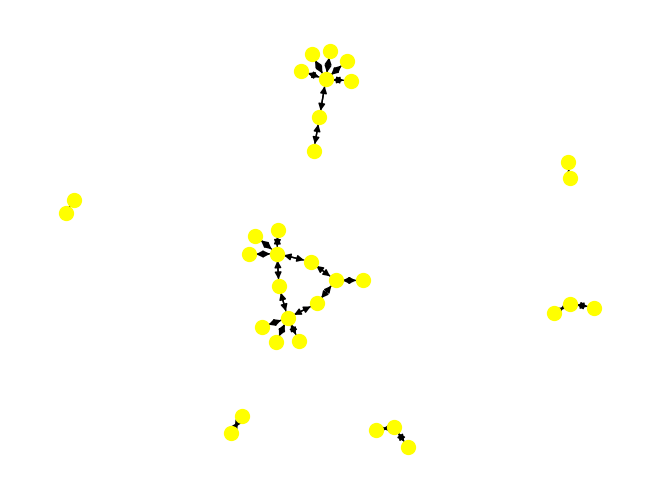

In [ ]:
# Relação Fornecedores x Orgãos

plot_graph(g.edges)

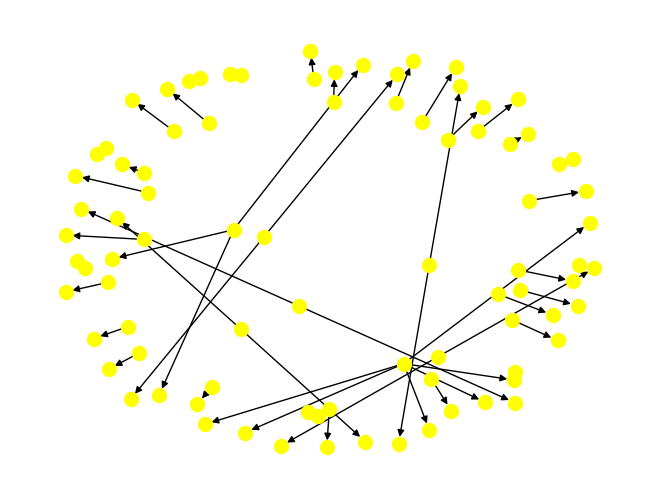

In [ ]:
# Relação Fornecedores x Unidades

plot_graph_2(g_2.edges)

In [ ]:
def plot_directed_graph(edge_list):
    gplot = nx.DiGraph()
    edge_labels = {}
    for row in edge_list.select("src", "dst", "relationship").take(50):
        gplot.add_edge(row["src"], row["dst"])
        edge_labels[(row["src"], row["dst"])] = row["relationship"]
    pos = nx.spring_layout(gplot)

    nx.draw(gplot, pos, with_labels=True, font_weight="bold", node_size=100, font_size=5)

    nx.draw_networkx_edge_labels(gplot, pos, edge_labels=edge_labels, font_color="green", font_size=5)

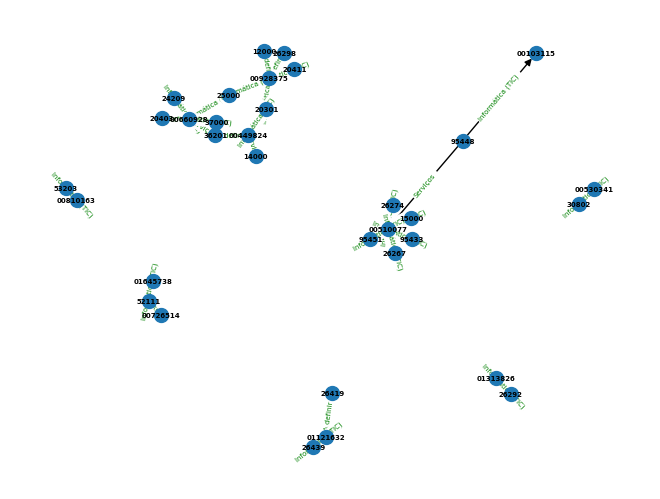

In [ ]:
plot_directed_graph(g.edges)

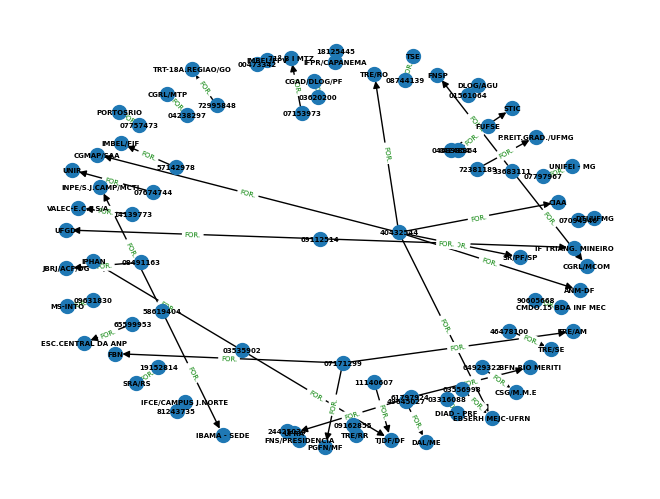

In [ ]:
plot_directed_graph(g_2.edges)

In [ ]:
g.edges.filter("relationship = 'Informática (TIC)'").count()

40

In [ ]:
g_2.edges.filter("relationship = 'FOR.'").count()

20053

In [ ]:
ranked_vertices = g.pageRank(maxIter=5).vertices

# Ordenando os vértices pelo valor do PageRank em ordem decrescente
ranked_vertices = ranked_vertices.orderBy("pagerank", ascending=False)

# Exibindo os 500 primeiros vértices sem truncamento
ranked_vertices.show(500, truncate=False)

/content/spark-3.5.1-bin-hadoop3/python/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.5.1-bin-hadoop3/python/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+--------+--------------------------------------------------+-------------------+
|id      |nome                                              |pagerank           |
+--------+--------------------------------------------------+-------------------+
|00510077|FRAZILLIO SOLUCOES DE TECNOLOGIA LTDA             |3.9261877354600707 |
|00928375|ABRANTES SOLUCOES LTDA                            |3.459203386877894  |
|00928375|DELTALAB CONSULTORIA E TREINAMENTOS LTDA          |3.459203386877894  |
|00660928|LIFE TECNOLOGIA E CONSULTORIA LTDA                |2.5537619294813374 |
|52111   |COMANDO DA AERONAUTICA                            |1.6633240625000003 |
|01121632|MAGNETICA SISTEMAS DE INFORMACAO LTDA - ME        |1.6633240625       |
|00449824|SOFTEXPERT SOFTWARE S.A.                          |1.63030312114077   |
|00530341|CONECTAA TECNOLOGIA DA INFORMACAO LTDA            |1.0000000000000004 |
|00810163|MABUYA TECH SOLUCOES EM TECNOLOGIA LTDA  - ME     |1.0000000000000004 |
|01313826|HYPERT

In [ ]:
from pyspark.sql.functions import col, lit, when
from pyspark.sql.types import IntegerType
import functools

chain = g.find("(a)-[ab]->(b); (b)-[bc]->(c); (c)-[cd]->(d)")

sumFriends =\
  lambda cnt,relationship: when(relationship == "Informática (TIC)", cnt+1).otherwise(cnt)

condition =\
  functools.reduce(lambda cnt,e: sumFriends(cnt, col(e).relationship), ["ab", "bc", "cd"], lit(0))
chainWith2Friends2 = chain.select("*").where((condition >= 2) & (col("a").id != col("b").id) & (col("b").id != col("c").id) & (col("c").id != col("d").id))
chainWith2Friends2 = chainWith2Friends2.dropDuplicates()

#chainWith2Friends2 = chain.where(condition >= 2)
chainWith2Friends2.show(truncate=False)

/content/spark-3.5.1-bin-hadoop3/python/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+------------------------------------------------------+------------------------------------+----------------------------------------------------+------------------------------------+------------------------------------------------------+------------------------------------+------------------------------------------------------+
|a                                                     |ab                                  |b                                                   |bc                                  |c                                                     |cd                                  |d                                                     |
+------------------------------------------------------+------------------------------------+----------------------------------------------------+------------------------------------+------------------------------------------------------+------------------------------------+------------------------------------------------------+
|{26274